# Practice Lab: Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [8]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [9]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

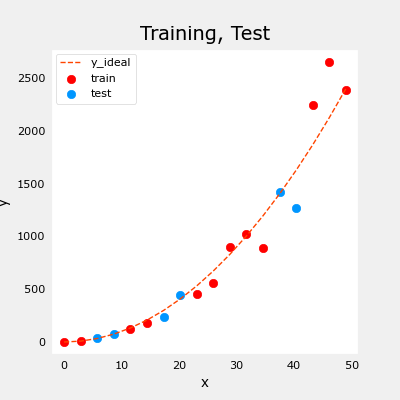

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [11]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    ### START CODE HERE ### 
    total_difference = (y - yhat)**2
    total_difference_array = total_difference.sum()
    err = (1/(2*m)) *(total_difference_array) 
    
    ### END CODE HERE ### 
    
    return(err)

In [12]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [13]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [14]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

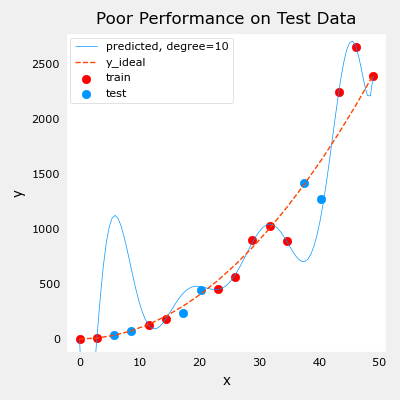

In [15]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [16]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

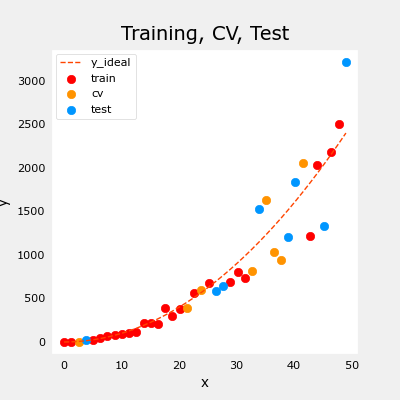

In [17]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [18]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

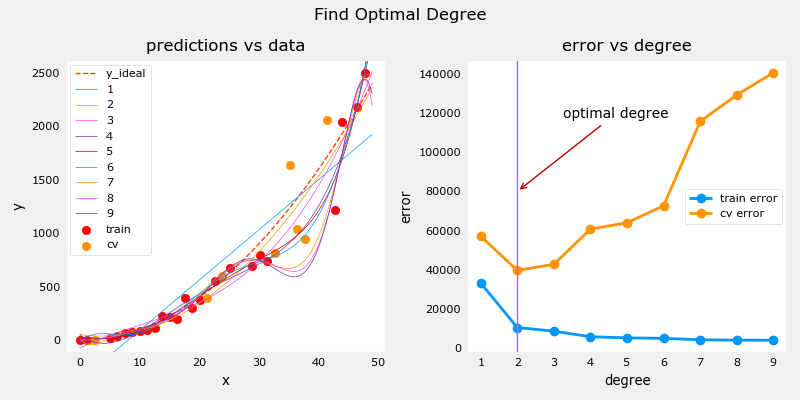

In [19]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [20]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

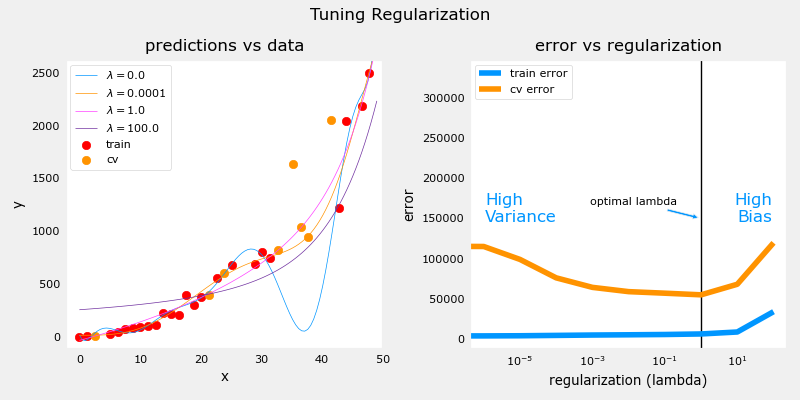

In [21]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

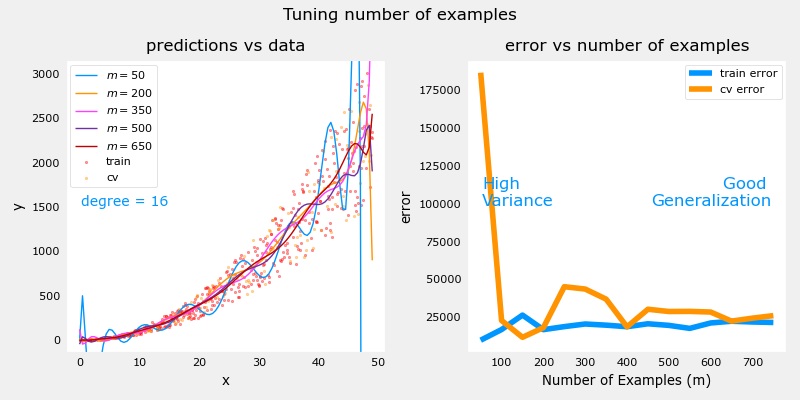

In [22]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [23]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


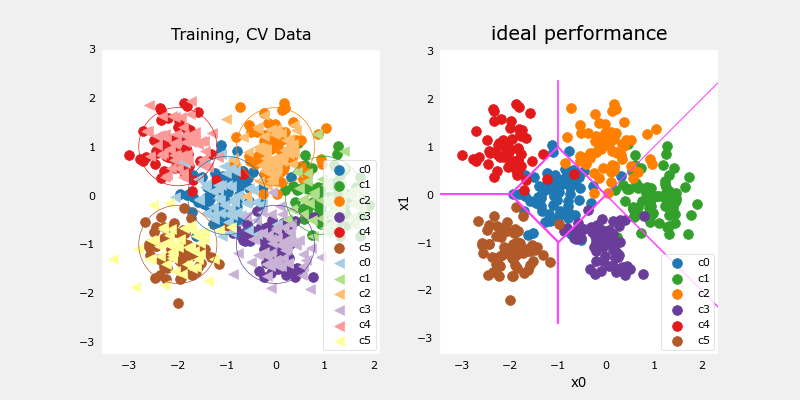

In [24]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [25]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    result = 0
    res = 0
    for i in range(m):
    ### START CODE HERE ### 
        if yhat[i] != y[i]:
            incorrect += 1        
    cerr = (incorrect)/m
    ### END CODE HERE ### 
    
    return(cerr)

In [26]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.


<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [27]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        
        Dense(units = 120, activation = 'relu'),
        Dense(units = 40, activation = 'relu'),
        Dense(units = 6, activation = 'linear')
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam
    ### END CODE HERE ### 
)

In [28]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 1.1343
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4178
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3234
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3002
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2717
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2425
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2270
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2282
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2002
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2137
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2046
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1620
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1466
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1505
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1639
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1417
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1469
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1422
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1447
Epoch 112/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1436
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1095
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1110
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1022
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0965
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0921
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1033
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1382
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1445
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1323
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1365
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1212
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1078
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0843
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0807
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0749
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0775
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0828
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0828
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0763
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0363
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0905
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0960
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2465
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2472
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1769
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1154
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1275
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1531
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1221
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1154
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1296
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1191
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1093
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 700/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 995/1000
13/1

In [29]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
All tests passed!


1082/1082 [==============================] - 1s 1ms/step


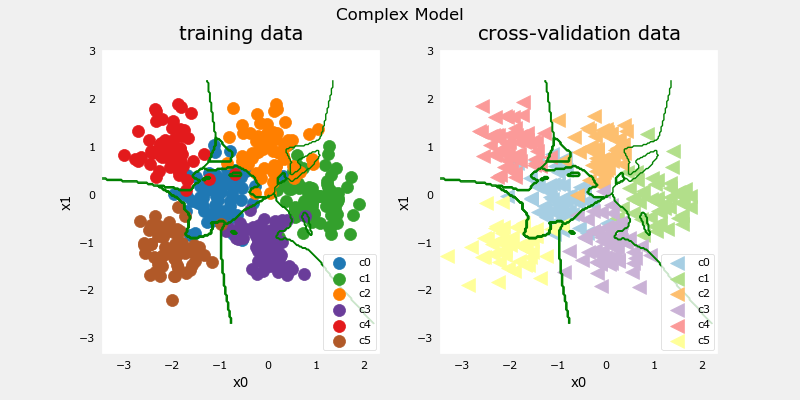

In [30]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [31]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 1ms/step
categorization error, training, complex model: 0.028
categorization error, cv,       complex model: 0.109


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [32]:
# UNQ_C4
# GRADED CELL: model_s
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 6, activation = 'relu'),
        Dense(units = 6, activation = 'linear')
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam
    ### START CODE HERE ### 
)


In [33]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6627
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3508
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1432
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9774
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8474
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7497
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6724
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6022
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5426
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4927
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4485
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4176
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1939
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1950
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1960
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1916
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1897
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1904
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1903
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1897
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1929
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1923
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1883
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1881
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1880
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1867
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1902
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1869
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 209/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1866
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1905
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1870
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1924
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1854
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1879
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1875
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1867
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1879
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1857
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1847
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1866
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1843
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1848
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1847
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1830
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1845
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1854
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1831
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1859
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1818
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1827
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1823
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1829
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1860
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1861
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1823
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1844
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1817
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1814
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1807
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1805
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1803
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1836
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1805
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1828
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1803
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1815
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1806
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1803
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1797
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1781
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1793
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1811
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1806
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1755
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1782
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1833
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1762
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1804
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1793
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1797
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1755
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1783
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1763
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1787
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1758
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1761
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1769
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1759
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1736
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1782
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1733
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1791
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1744
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1741
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1738
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1742
Epoch 995/1000
13/1

In [34]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
All tests passed!


1082/1082 [==============================] - 1s 962us/step


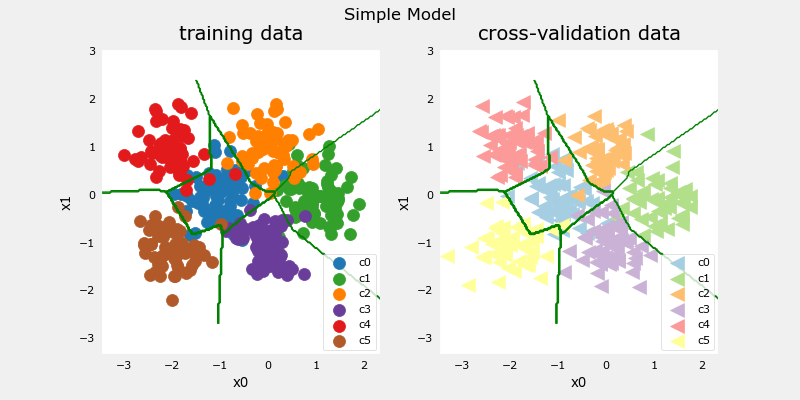

In [35]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [36]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 1ms/step
categorization error, training, simple model, 0.072, complex model: 0.028
categorization error, cv,       simple model, 0.069, complex model: 0.109


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [46]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)) ,
        Dense(units = 40, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)) ,
        Dense(units = 6, activation = 'linear')
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam
    ### START CODE HERE ### 
)

In [47]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000


KeyError: in user code:

    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\engine\training.py", line 1027, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 527, in minimize
        self.apply_gradients(grads_and_vars)
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1140, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 634, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1169, in _internal_apply_gradients
        grads_and_vars,
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1217, in _distributed_apply_gradients_fn
        var, apply_grad_to_update_var, args=(grad,), group=False
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1213, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "C:\Users\Akif\anaconda3\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 217, in _update_step
        f"The optimizer cannot recognize variable {variable.name}. "

    KeyError: 'The optimizer cannot recognize variable dense_32/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.{self.__class__.__name__}.'


In [39]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 120)               360       
                                                                 
 dense_6 (Dense)             (None, 40)                4840      
                                                                 
 dense_7 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
ddd
All tests passed!


1082/1082 [==============================] - 1s 1ms/step


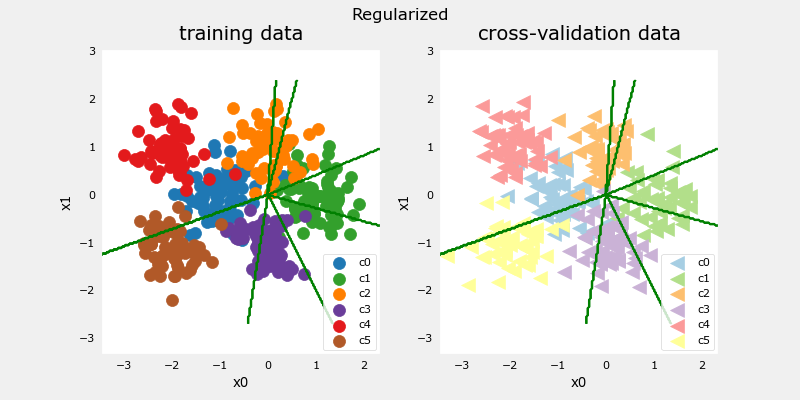

In [40]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [41]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 2ms/step
categorization error, training, regularized: 0.835, simple model, 0.072, complex model: 0.028
categorization error, cv,       regularized: 0.856, simple model, 0.069, complex model: 0.109


The simple model is a bit better in the training set than the regularized model but worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [42]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 0.9897
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3676
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2995
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2755
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2357
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2213
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2297
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2011
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2169
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2053
Epoch 13/1000
13/13 [====

Epoch 101/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1815
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1400
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1427
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1457
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1325
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1345
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1374
Epoch 112/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1495
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0895
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0998
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0978
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0962
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1153
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1171
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1275
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1287
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1144
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1276
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0778
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0674
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0602
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1022
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 595/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 600/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 701/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 792/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 796/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0599
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0449
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0366
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 995/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 83/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 84/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2375
Epoch 85/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 86/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2293
Epoch 87/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2265
Epoch 88/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2328
Epoch 89/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2335
Epoch 90/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 92/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2175
Epoch 93/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2224
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2166
Epoch 182/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2110
Epoch 183/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2068
Epoch 184/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2022
Epoch 185/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2054
Epoch 186/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2003
Epoch 187/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 188/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2060
Epoch 190/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2122
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2189
Epoch 192/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2048
Epoch 193/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1960
Epoch 280/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 281/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2042
Epoch 282/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 283/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2052
Epoch 284/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1942
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1867
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1914
Epoch 287/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2117
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2053
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2049
Epoch 291/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1815
Epoch 378/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822
Epoch 379/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1855
Epoch 380/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 381/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1835
Epoch 382/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1936
Epoch 383/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 384/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 385/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1849
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1861
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1854
Epoch 389/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 476/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1884
Epoch 477/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1932
Epoch 478/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2003
Epoch 479/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1984
Epoch 480/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1912
Epoch 481/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1811
Epoch 483/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1956
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1833
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1800
Epoch 487/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1828
Epoch 574/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1761
Epoch 575/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1711
Epoch 576/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1680
Epoch 577/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 578/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1757
Epoch 579/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1698
Epoch 580/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 581/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1744
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1816
Epoch 585/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1710
Epoch 672/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1702
Epoch 673/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1652
Epoch 674/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1720
Epoch 675/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1751
Epoch 676/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1683
Epoch 677/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 678/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677
Epoch 679/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1727
Epoch 680/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1763
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1805
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1839
Epoch 683/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 770/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592
Epoch 771/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1703
Epoch 772/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1686
Epoch 773/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1758
Epoch 774/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1688
Epoch 775/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1663
Epoch 776/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1547
Epoch 777/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1614
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628
Epoch 781/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1557
Epoch 868/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1634
Epoch 869/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582
Epoch 870/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1678
Epoch 871/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665
Epoch 872/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1485
Epoch 873/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 874/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 875/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1501
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1538
Epoch 879/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1579
Epoch 966/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1531
Epoch 967/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1698
Epoch 968/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1850
Epoch 969/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1719
Epoch 970/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1653
Epoch 971/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1528
Epoch 972/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 973/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1489
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1544
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1546
Epoch 976/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1533
Epoch 977/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 65/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3841
Epoch 66/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 67/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3640
Epoch 68/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 69/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3236
Epoch 70/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 71/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3214
Epoch 72/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2984
Epoch 73/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3078
Epoch 74/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3121
Epoch 75/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3272
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2765
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2882
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2866
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2767
Epoch 168/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 169/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2821
Epoch 170/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2830
Epoch 171/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 172/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 173/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2857
Epoch 174/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2880
Epoch 175/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 262/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 263/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 264/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 265/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 266/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 267/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 268/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2573
Epoch 269/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 270/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2606
Epoch 271/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2540
Epoch 272/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2576
Epoch 273/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2473
Epoch 360/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 361/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 362/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 363/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2701
Epoch 364/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 365/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2539
Epoch 366/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2522
Epoch 367/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 368/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2598
Epoch 369/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 370/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 371/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2327
Epoch 458/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2539
Epoch 459/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2393
Epoch 460/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2410
Epoch 461/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 462/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2397
Epoch 463/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2377
Epoch 464/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2420
Epoch 465/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2485
Epoch 466/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2528
Epoch 467/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 468/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2467
Epoch 469/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2397
Epoch 556/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2284
Epoch 557/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 558/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2420
Epoch 559/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 560/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 561/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2376
Epoch 562/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2524
Epoch 563/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2298
Epoch 564/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 565/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2342
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2411
Epoch 567/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2234
Epoch 654/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2355
Epoch 655/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2286
Epoch 656/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2305
Epoch 657/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2291
Epoch 658/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 659/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2304
Epoch 660/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2326
Epoch 661/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2270
Epoch 662/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2346
Epoch 663/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 664/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2631
Epoch 665/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2314
Epoch 752/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2360
Epoch 753/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2236
Epoch 754/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 755/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2299
Epoch 756/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2434
Epoch 757/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2435
Epoch 758/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2283
Epoch 759/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2256
Epoch 760/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2372
Epoch 761/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2338
Epoch 762/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2297
Epoch 763/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2276
Epoch 850/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 851/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 852/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2469
Epoch 853/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2336
Epoch 854/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2267
Epoch 855/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2349
Epoch 856/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2236
Epoch 857/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2280
Epoch 858/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2240
Epoch 859/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 860/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2278
Epoch 861/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 948/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2337
Epoch 949/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2211
Epoch 950/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2182
Epoch 951/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2248
Epoch 952/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2437
Epoch 953/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2321
Epoch 954/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2423
Epoch 955/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2271
Epoch 956/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2251
Epoch 957/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2309
Epoch 958/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 959/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4523
Epoch 47/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4292
Epoch 48/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4796
Epoch 49/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4683
Epoch 50/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4398
Epoch 51/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4454
Epoch 52/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4270
Epoch 53/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4418
Epoch 54/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4247
Epoch 55/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4547
Epoch 56/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4165
Epoch 57/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4348
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.3597
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3574
Epoch 147/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3820
Epoch 148/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 149/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3570
Epoch 150/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 151/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 152/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 153/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3777
Epoch 154/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 155/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3624
Epoch 156/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3661
Epoch 157/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 244/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3480
Epoch 245/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 246/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3360
Epoch 247/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3264
Epoch 248/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3372
Epoch 249/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 250/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3392
Epoch 251/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 252/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3402
Epoch 253/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3395
Epoch 254/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 255/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3267
Epoch 342/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3333
Epoch 343/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3224
Epoch 344/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3184
Epoch 345/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3174
Epoch 346/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 347/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 348/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3505
Epoch 349/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3112
Epoch 350/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3354
Epoch 351/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3140
Epoch 352/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3366
Epoch 353/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3090
Epoch 440/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3059
Epoch 441/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3115
Epoch 442/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3199
Epoch 443/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3165
Epoch 444/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 445/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 446/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 447/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3400
Epoch 448/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 449/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3096
Epoch 450/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3072
Epoch 451/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3599
Epoch 538/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3188
Epoch 539/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2959
Epoch 540/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3133
Epoch 541/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3262
Epoch 542/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3345
Epoch 543/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 544/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3155
Epoch 545/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 546/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 547/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3390
Epoch 548/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3103
Epoch 549/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3303
Epoch 636/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3182
Epoch 637/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3078
Epoch 638/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 639/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2953
Epoch 640/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 641/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2947
Epoch 642/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 643/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3213
Epoch 644/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 645/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 646/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3234
Epoch 647/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2961
Epoch 734/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 735/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3191
Epoch 737/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3267
Epoch 738/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3018
Epoch 740/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3076
Epoch 741/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3157
Epoch 742/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3478
Epoch 743/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2980
Epoch 744/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 745/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 832/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3201
Epoch 833/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3137
Epoch 834/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3037
Epoch 835/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 836/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2868
Epoch 837/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 838/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 839/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 840/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3003
Epoch 841/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2900
Epoch 842/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 843/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3063
Epoch 930/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3155
Epoch 931/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3022
Epoch 932/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 933/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2986
Epoch 934/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 935/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 936/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 937/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2900
Epoch 938/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3049
Epoch 939/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 940/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 941/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.6121
Epoch 29/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6022
Epoch 30/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6206
Epoch 31/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6159
Epoch 32/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6163
Epoch 33/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6203
Epoch 34/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6363
Epoch 35/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6251
Epoch 36/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5986
Epoch 37/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5753
Epoch 38/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5597
Epoch 39/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5606
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.4497
Epoch 128/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4317
Epoch 129/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4409
Epoch 130/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4366
Epoch 131/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4725
Epoch 132/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4539
Epoch 133/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4294
Epoch 134/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4484
Epoch 135/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4399
Epoch 136/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4529
Epoch 137/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4335
Epoch 138/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4476
Epoch 139/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4291
Epoch 226/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4374
Epoch 227/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4702
Epoch 228/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4084
Epoch 229/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4042
Epoch 230/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4243
Epoch 231/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4078
Epoch 232/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4211
Epoch 233/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3953
Epoch 234/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3934
Epoch 235/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3901
Epoch 236/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3975
Epoch 237/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4346
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4338
Epoch 325/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4045
Epoch 326/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3927
Epoch 327/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3853
Epoch 328/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4015
Epoch 329/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 330/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3721
Epoch 331/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3755
Epoch 332/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3790
Epoch 333/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4185
Epoch 334/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4007
Epoch 335/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3807
Epoch 422/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 423/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 424/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3739
Epoch 425/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3625
Epoch 426/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3609
Epoch 427/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 428/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3735
Epoch 429/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3723
Epoch 430/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3703
Epoch 431/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3555
Epoch 432/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3616
Epoch 433/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3640
Epoch 520/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3654
Epoch 521/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3475
Epoch 522/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3621
Epoch 523/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3774
Epoch 524/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 525/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3481
Epoch 526/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3552
Epoch 527/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 528/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 529/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3751
Epoch 530/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3666
Epoch 531/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3276
Epoch 618/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3706
Epoch 619/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4068
Epoch 620/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3952
Epoch 621/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3452
Epoch 622/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3452
Epoch 623/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 624/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3306
Epoch 625/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3299
Epoch 626/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3416
Epoch 627/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3547
Epoch 628/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3689
Epoch 629/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 716/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3347
Epoch 717/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 718/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3701
Epoch 719/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3699
Epoch 720/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3754
Epoch 721/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3668
Epoch 722/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 723/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3609
Epoch 724/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3453
Epoch 725/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 726/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 727/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3315
Epoch 814/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3353
Epoch 815/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3440
Epoch 816/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3437
Epoch 817/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3567
Epoch 818/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3530
Epoch 819/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3231
Epoch 820/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 821/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3794
Epoch 822/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 823/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 824/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 825/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3296
Epoch 912/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3320
Epoch 913/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 914/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3504
Epoch 915/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3455
Epoch 916/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3511
Epoch 917/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3416
Epoch 918/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3355
Epoch 919/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3517
Epoch 920/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3702
Epoch 921/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3359
Epoch 922/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 923/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 1.0598
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0274
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9879
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9711
Epoch 13/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9615
Epoch 14/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9621
Epoch 15/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9149
Epoch 16/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9073
Epoch 17/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9149
Epoch 18/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9017
Epoch 19/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8770
Epoch 20/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8631
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5908
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5764
Epoch 111/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5742
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5661
Epoch 113/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5593
Epoch 114/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5569
Epoch 115/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5594
Epoch 116/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5639
Epoch 117/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5892
Epoch 118/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5952
Epoch 119/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6031
Epoch 120/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5879
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.5202
Epoch 208/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5213
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5306
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5045
Epoch 211/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5075
Epoch 212/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4927
Epoch 213/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4898
Epoch 214/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4883
Epoch 215/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4945
Epoch 216/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5076
Epoch 217/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4973
Epoch 218/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5016
Epoch 219/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4556
Epoch 306/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4783
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4631
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4523
Epoch 309/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4641
Epoch 310/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4544
Epoch 311/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4474
Epoch 312/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4480
Epoch 313/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4560
Epoch 314/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4579
Epoch 315/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4508
Epoch 316/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4476
Epoch 317/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4402
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4414
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4249
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4305
Epoch 407/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4426
Epoch 408/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4480
Epoch 409/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4286
Epoch 410/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4497
Epoch 411/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4729
Epoch 412/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4307
Epoch 413/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4368
Epoch 414/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4462
Epoch 415/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4101
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4221
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4446
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4526
Epoch 505/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4451
Epoch 506/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4580
Epoch 507/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4463
Epoch 508/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4062
Epoch 509/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 510/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4140
Epoch 511/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4224
Epoch 512/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4242
Epoch 513/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3968
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4075
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3942
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4047
Epoch 603/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3979
Epoch 604/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3963
Epoch 605/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3985
Epoch 606/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4225
Epoch 607/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4205
Epoch 608/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4194
Epoch 609/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4084
Epoch 610/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4274
Epoch 611/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3907
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4045
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 701/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4004
Epoch 702/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 703/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 704/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4069
Epoch 705/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3984
Epoch 706/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4033
Epoch 707/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4731
Epoch 708/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4017
Epoch 709/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4438
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4485
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3832
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 799/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3891
Epoch 800/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3906
Epoch 801/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3842
Epoch 802/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3790
Epoch 803/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3737
Epoch 804/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3692
Epoch 805/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3881
Epoch 806/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3894
Epoch 807/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3843
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3786
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4080
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3843
Epoch 897/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3863
Epoch 898/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3883
Epoch 899/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4085
Epoch 900/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3971
Epoch 901/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4259
Epoch 902/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4235
Epoch 903/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4194
Epoch 904/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3767
Epoch 905/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3859
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3624
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3873
Epoch 995/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3877
Epoch 996/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3773
Epoch 997/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4123
Epoch 998/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3762
Epoch 999/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3918
Epoch 1000/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3930
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 9.9063
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.2999


13/13 [==============================] - 0s 2ms/step - loss: 0.6766
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6842
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 93/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6639
Epoch 94/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6630
Epoch 95/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6650
Epoch 96/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6575
Epoch 97/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6630
Epoch 98/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6726
Epoch 99/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6919
Epoch 100/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7012
Epoch 101/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5702
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5596
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5749
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5753
Epoch 193/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5640
Epoch 194/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5556
Epoch 195/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5563
Epoch 196/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5513
Epoch 197/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5665
Epoch 198/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5540
Epoch 199/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5606
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5587
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5723
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5716
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5258
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5244
Epoch 291/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 292/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5118
Epoch 293/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5185
Epoch 294/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5243
Epoch 295/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5549
Epoch 296/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5247
Epoch 297/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5150
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5197
Epoch 299/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4987
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4830
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5031
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5014
Epoch 389/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4903
Epoch 390/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4809
Epoch 391/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4866
Epoch 392/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4915
Epoch 393/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4861
Epoch 394/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4892
Epoch 395/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5148
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5395
Epoch 397/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5227
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4766
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5032
Epoch 486/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4814
Epoch 487/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4706
Epoch 488/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4643
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4680
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4772
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4900
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5063
Epoch 493/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4795
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4570
Epoch 495/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4979
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4871
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4693
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4520
Epoch 585/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4786
Epoch 586/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5352
Epoch 587/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4805
Epoch 588/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4597
Epoch 589/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4387
Epoch 590/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4405
Epoch 591/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4495
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4469
Epoch 593/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4567
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4402
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4763
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4609
Epoch 683/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4520
Epoch 684/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4445
Epoch 685/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4438
Epoch 686/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4458
Epoch 687/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4420
Epoch 688/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4260
Epoch 689/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4659
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4625
Epoch 691/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4870
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4578
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4422
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4258
Epoch 781/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4617
Epoch 782/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 783/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4350
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4350
Epoch 785/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 786/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4263
Epoch 787/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4317
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4234
Epoch 789/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4238
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4308
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4402
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4377
Epoch 879/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4509
Epoch 880/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4753
Epoch 881/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4786
Epoch 882/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4772
Epoch 883/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4981
Epoch 884/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4731
Epoch 885/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4497
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4077
Epoch 887/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4173
Epoch 974/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4170
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4106
Epoch 976/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4132
Epoch 977/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4168
Epoch 978/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4101
Epoch 979/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4282
Epoch 980/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4656
Epoch 981/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4492
Epoch 982/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4376
Epoch 983/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4109
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 985/1000
13/1

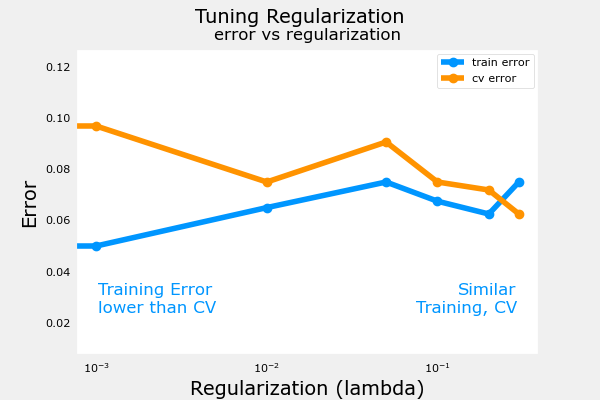

In [43]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 1ms/step


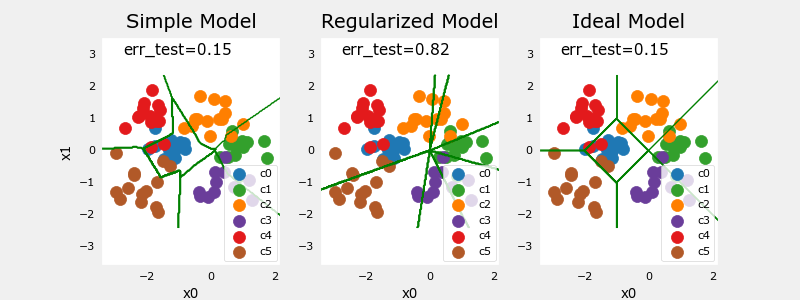

In [44]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)